In [1]:
#Modules to install via pip pandas,ipynb


import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import json
from pprint import pprint
import os
import import_ipynb
from functions import *



Using function to import datas

In [2]:
dataList=coojaJsonImporter("./traces")
test1BH1=dataList[0]
test1BH2=dataList[1]
testNorm =dataList[2]
data=[]
cases=["Normal Network",
      "Black Hole Network 1",
        "Black Hole Network 2"
      ]
for nodeList in dataList:
    data.append(createNodes(nodeList))

nodeListNorm=createNodes(testNorm)
nodeListBH1=createNodes(test1BH1)
nodeListBH2=createNodes(test1BH2)
#All data collection is in variable node that is a list of list of nodes
#3 nets input x 9 nodes by net
data[0][0].pkts[1:5] 


Importing test_1BH_2018-11-09_12_31_25.json
Importing test_1BH_2018-11-09_14_37_46.json
Importing test_nom_2018-11-09_08_55_11.json


pkt     rtt   ttl
1  1.0  8170.0  63.0
2  2.0   973.0  63.0
3  3.0   848.0  63.0
4  4.0  1022.0  63.0

Importing test_1BH_2018-11-09_12_31_25.json
Importing test_1BH_2018-11-09_14_37_46.json
Importing test_nom_2018-11-09_08_55_11.json


pkt     rtt   ttl
1  1.0  8170.0  63.0
2  2.0   973.0  63.0
3  3.0   848.0  63.0
4  4.0  1022.0  63.0

Plotting Round trip time in 3 graphs (1 every hop), in every graph there are 3 nodes as the topology is 3X3

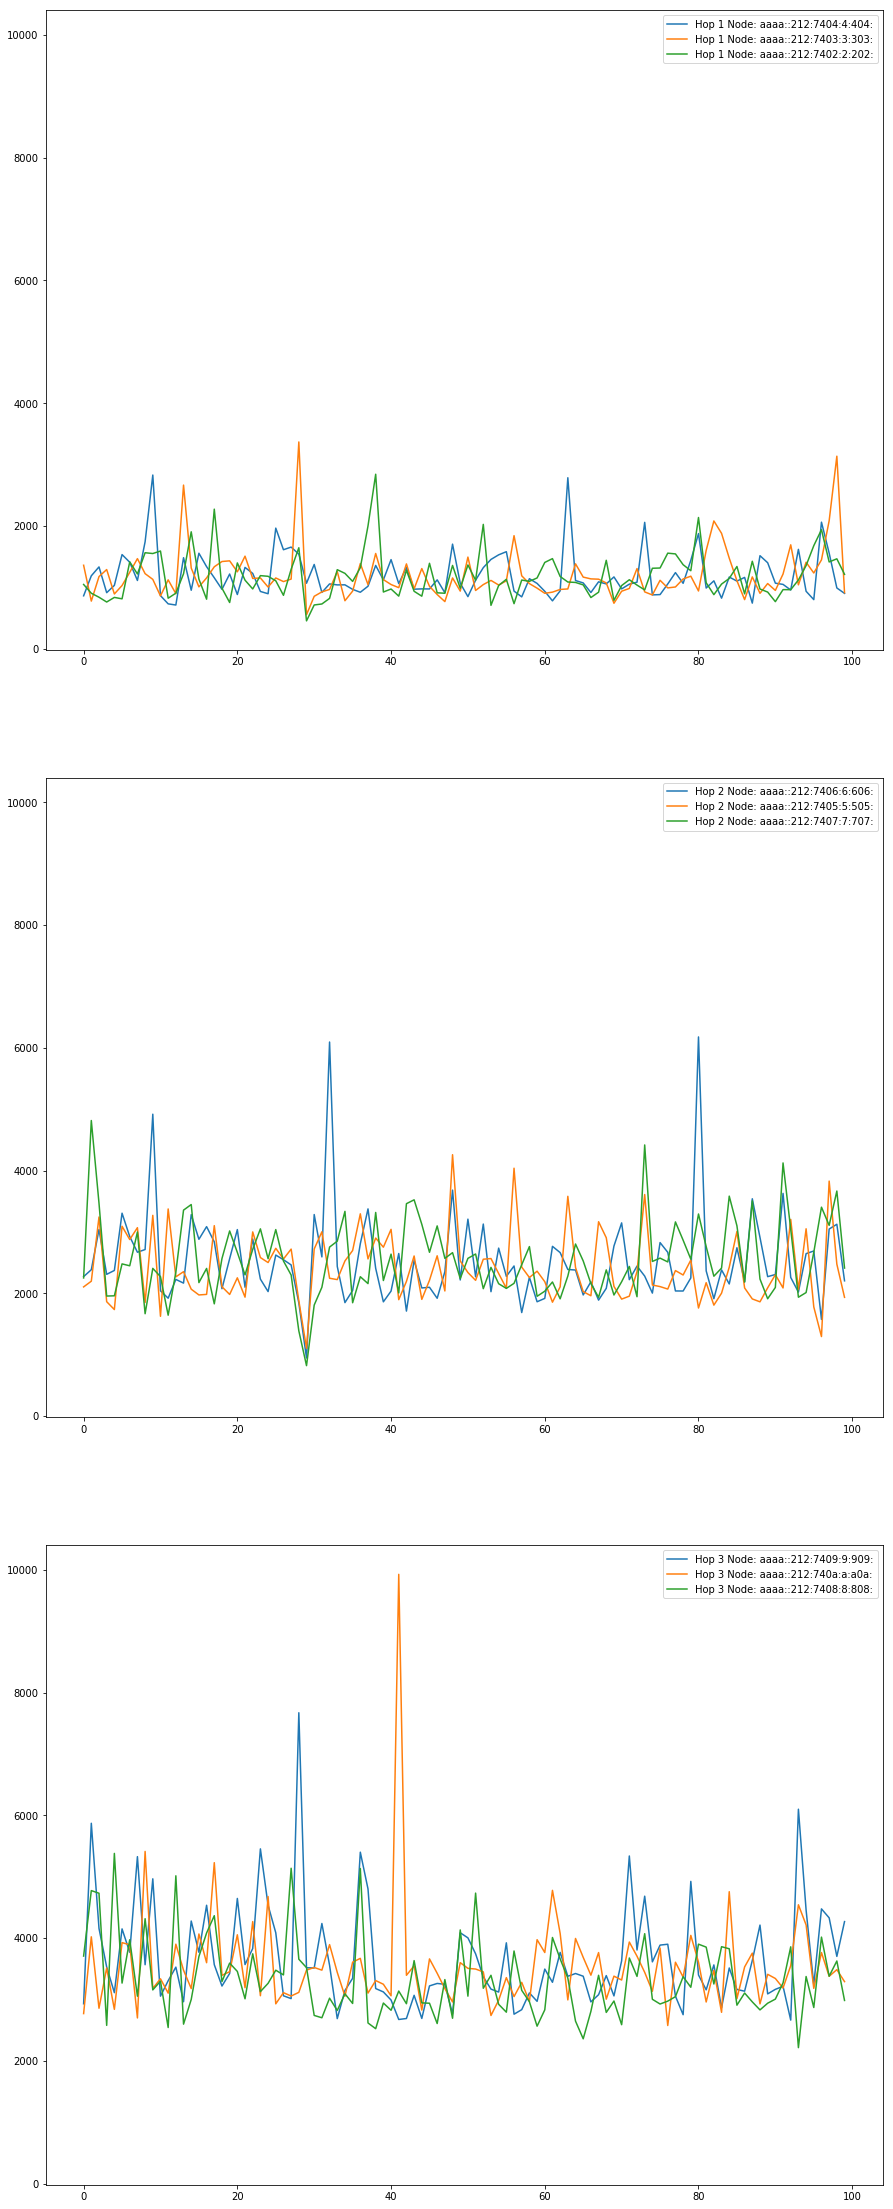

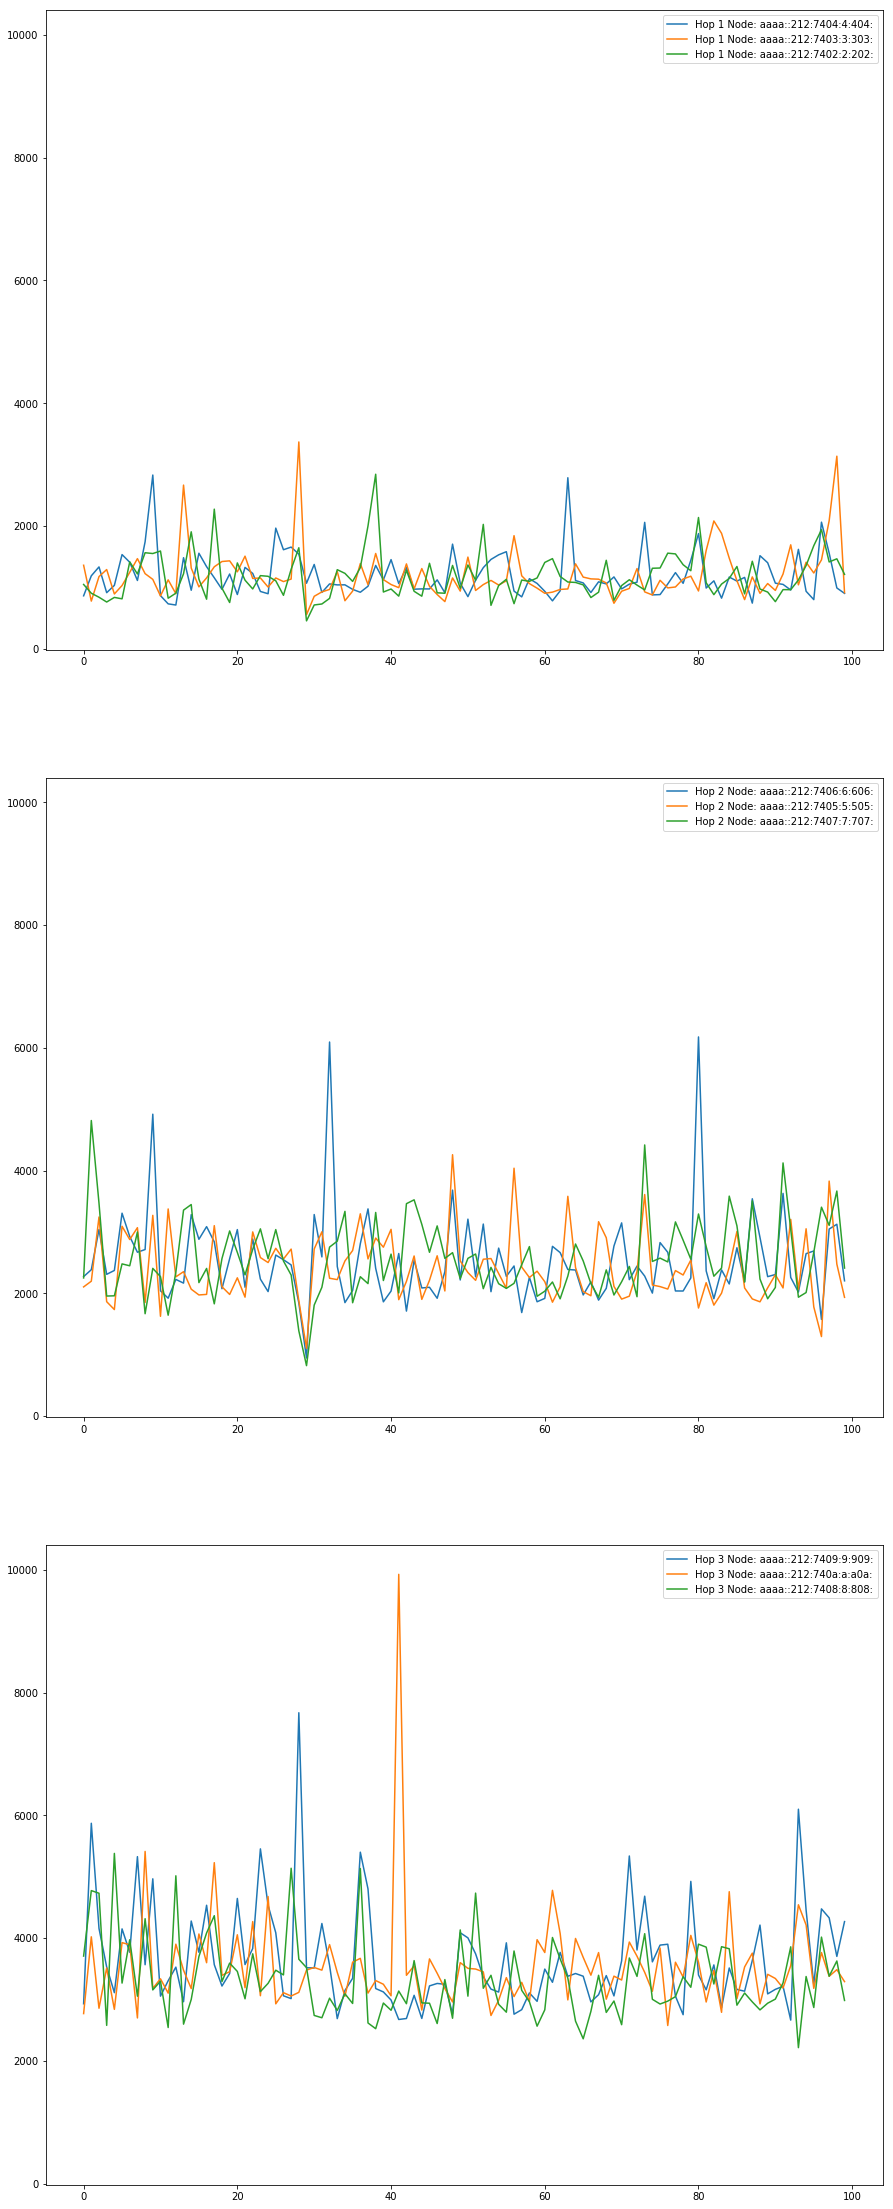

In [12]:
fig, axs= plt.subplots(3,1, figsize=(15,40),sharey=True)

for node in nodeListNorm:
    a=node.hop
    if(a==1):
        axs[0].plot(node.pkts["pkt"],node.pkts["rtt"], label="Hop 1 Node: "+node.ip)

    elif(a==2):
        axs[1].plot(node.pkts["pkt"],node.pkts["rtt"], label="Hop 2 Node: "+node.ip)

    elif(a==3):
        axs[2].plot(node.pkts["pkt"],node.pkts["rtt"], label="Hop 3 Node: "+node.ip)   
        
for ax in axs:
    
    ax.legend()

plt.show()


We print in 9 different Graph the packets RTT in Normal case, Black Hole 1 case and Black Hole 2 case

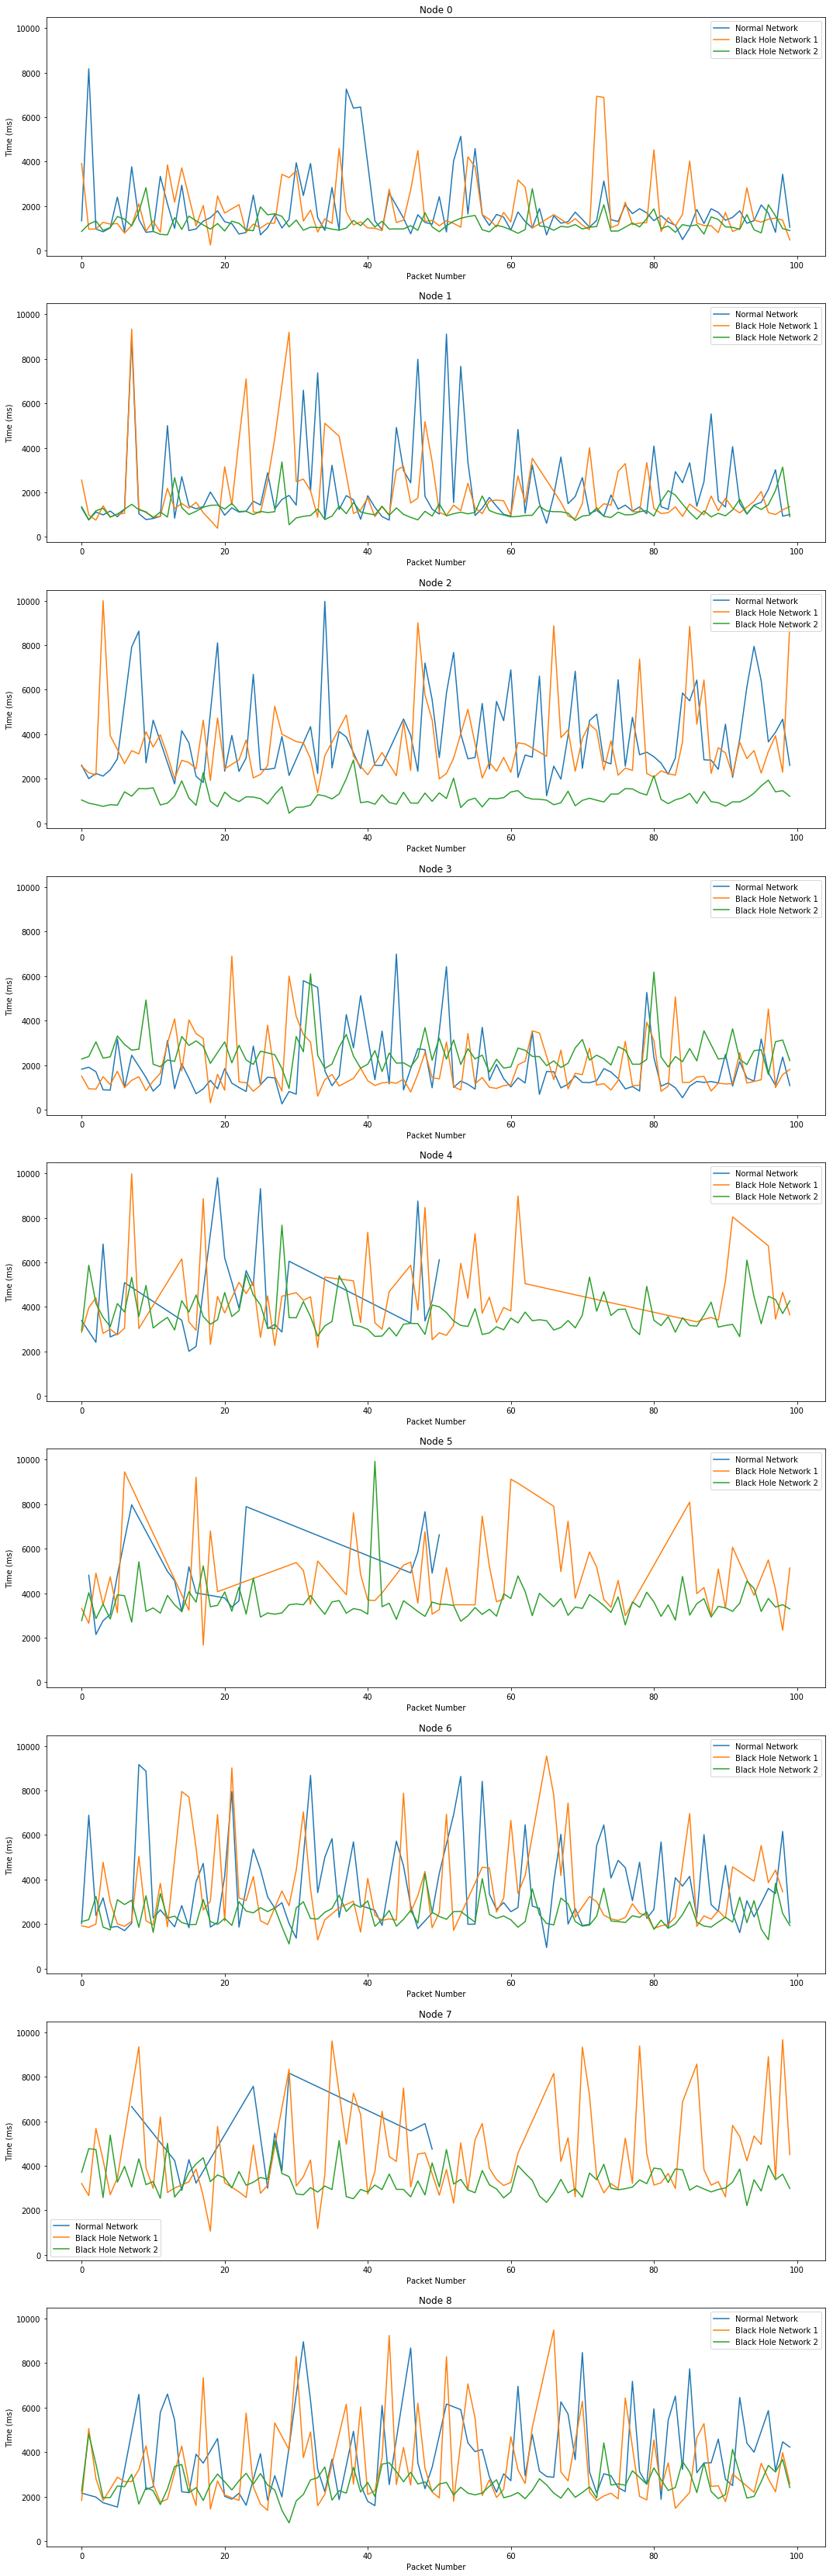

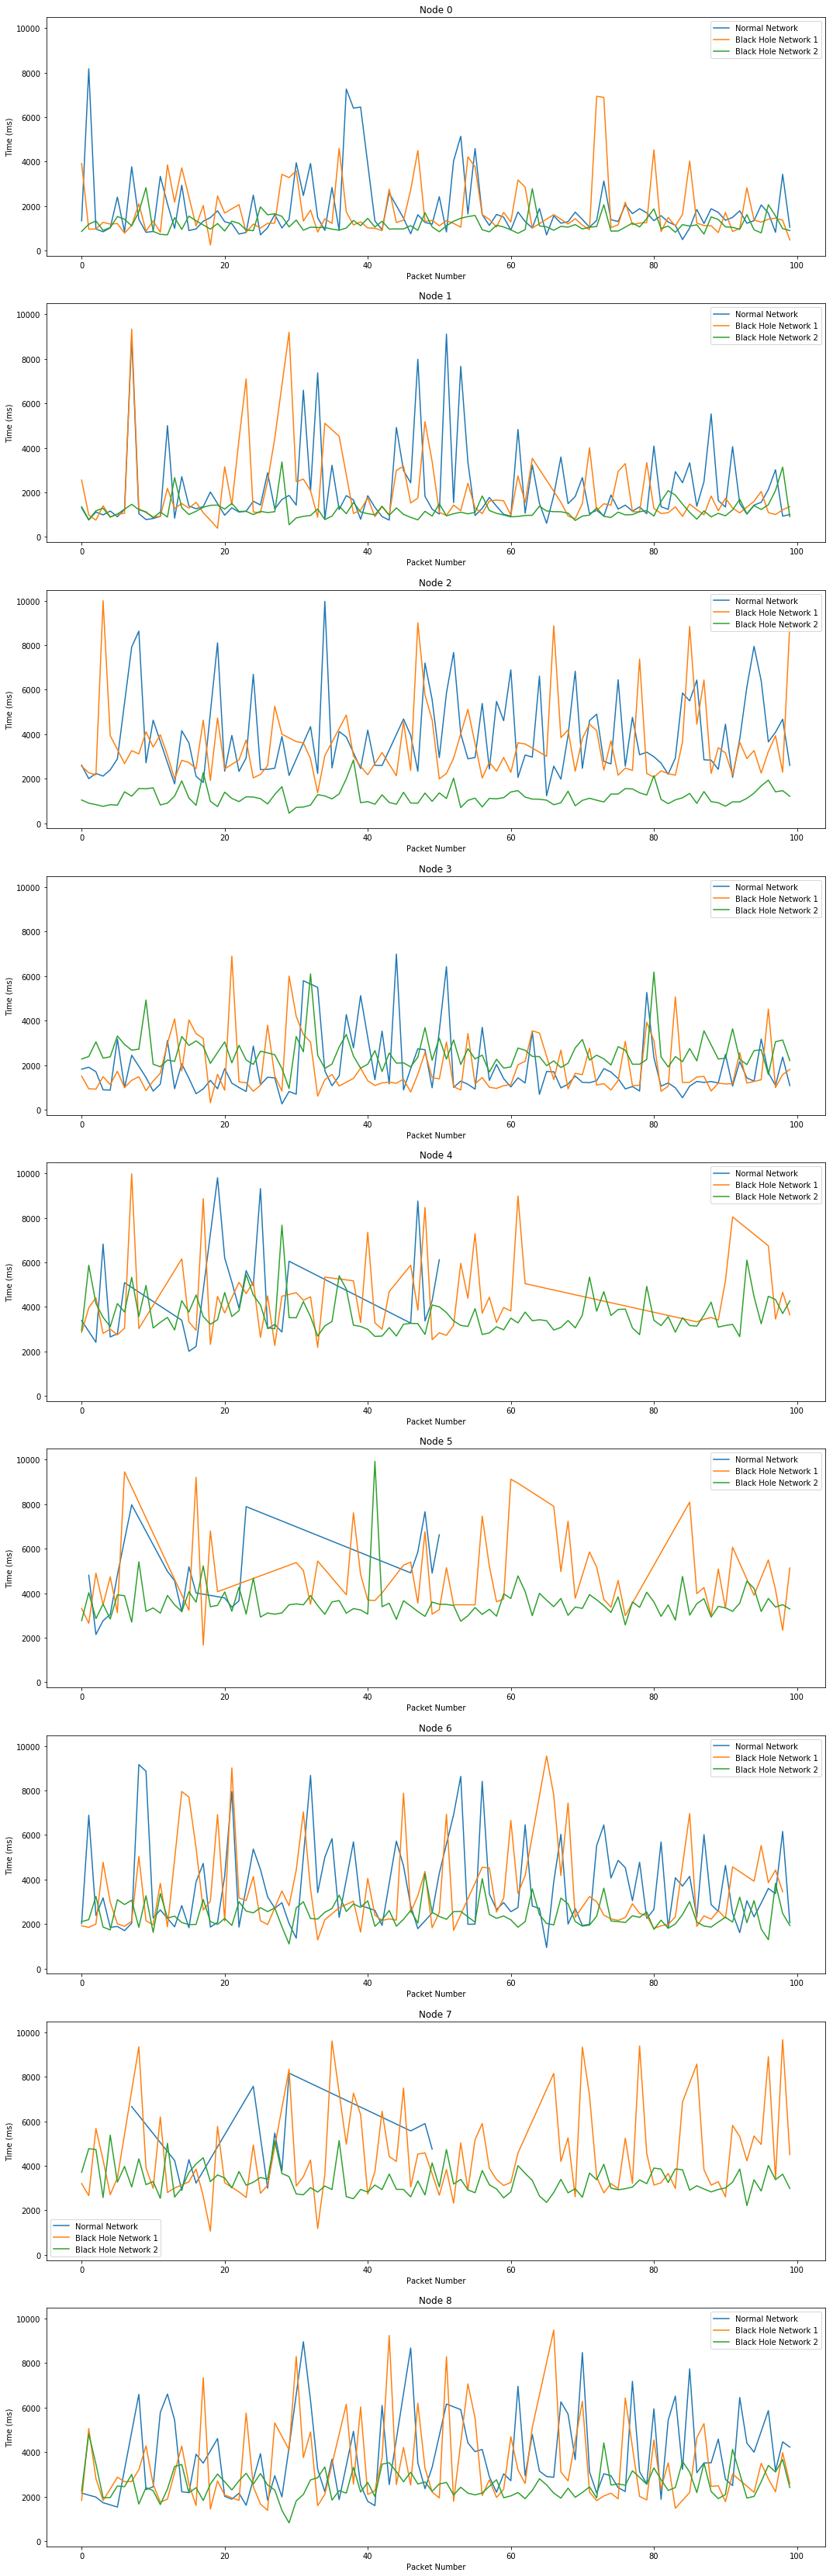

In [13]:
range(len(data))
fig, axs= plt.subplots(9,1, figsize=(18,60),sharey=True, )
for i in range(len(data)):
   
    for j in range(len(data[i])):
        
        #fig, axs= plt.subplots(i,1, figsize=(20,40),sharey=True, sharex=True)
        axs[j].plot(data[i][j].pkts["pkt"],data[i][j].pkts["rtt"],label=cases[i]   )
        axs[j].set_title("Node "+ str(j))
        axs[j].set_xlabel("Packet Number")
        axs[j].set_ylabel("Time (ms)")
        axs[j].legend()

plt.show()

Get an idea of how the packets in every node are, divided by network.
-Green= Normal Net
-Blue=  Black Hole 1
-Orange=Black Hole 2

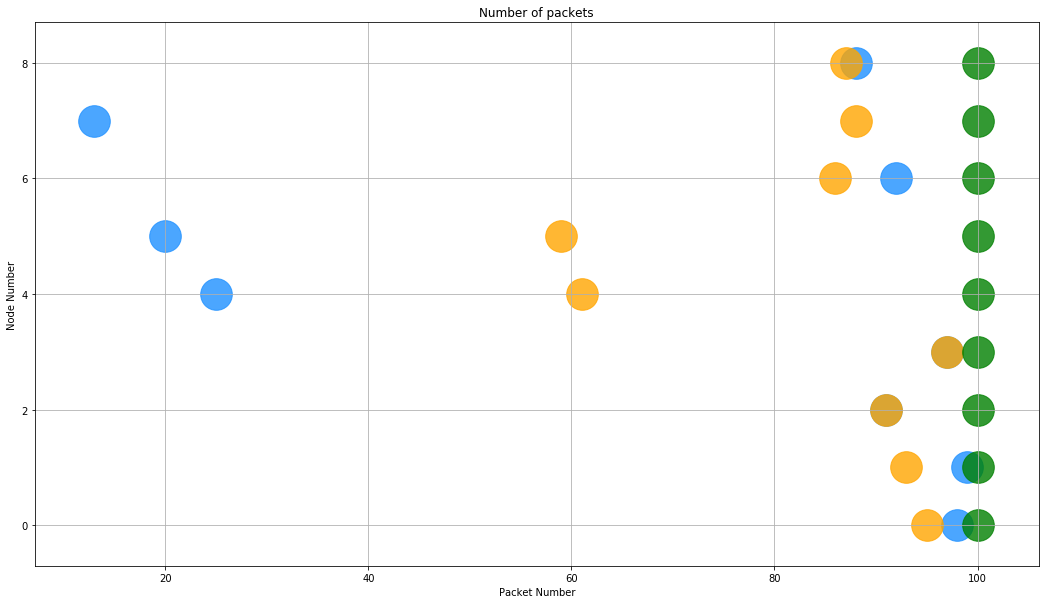

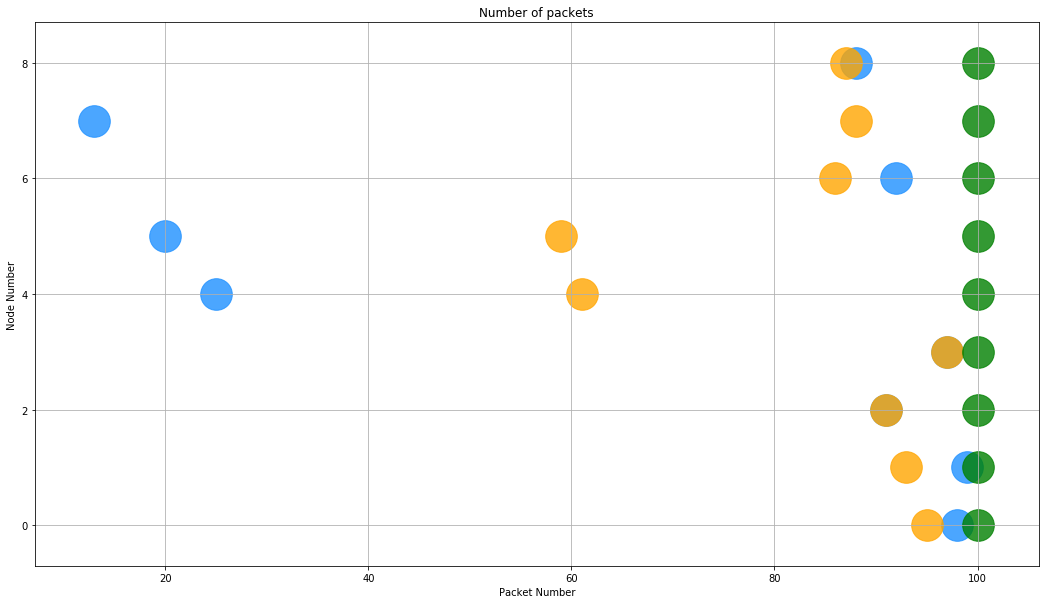

In [14]:
colors = ['dodgerblue', 'orange', 'green']
cases=['Normal','Black Hole 1', 'Black Hole 2']
numberOfPackets=np.zeros(shape=(len(data),len(data[0])))
numberOfPacketsT=numberOfPackets.transpose()

for i in range(len(data)):
    
    for j in range(len(data[i])):
        numberOfPackets[i][j]=len(data[i][j].pkts)
        


fig, axs = plt.subplots(1,figsize=(18,10))
for i in range(len(data)):
    for j in range(len(data[i])):
        axs.scatter(len(data[i][j].pkts),j,1000,
                    label="Node "+ str(j) ,
                    color=colors[i],
                   alpha=0.8)
        axs.set_title("Number of packets")
        axs.set_xlabel("Packet Number")
        axs.set_ylabel("Node Number")
        axs.grid(True)
        #axs.legend()
        



Packet division

-Green= Normal Net
-Blue=  Black Hole 1
-Orange=Black Hole 2

We can see that in the case of normal network we have 100 packets
When in the case of a Black Hole attack we have less packets even 0

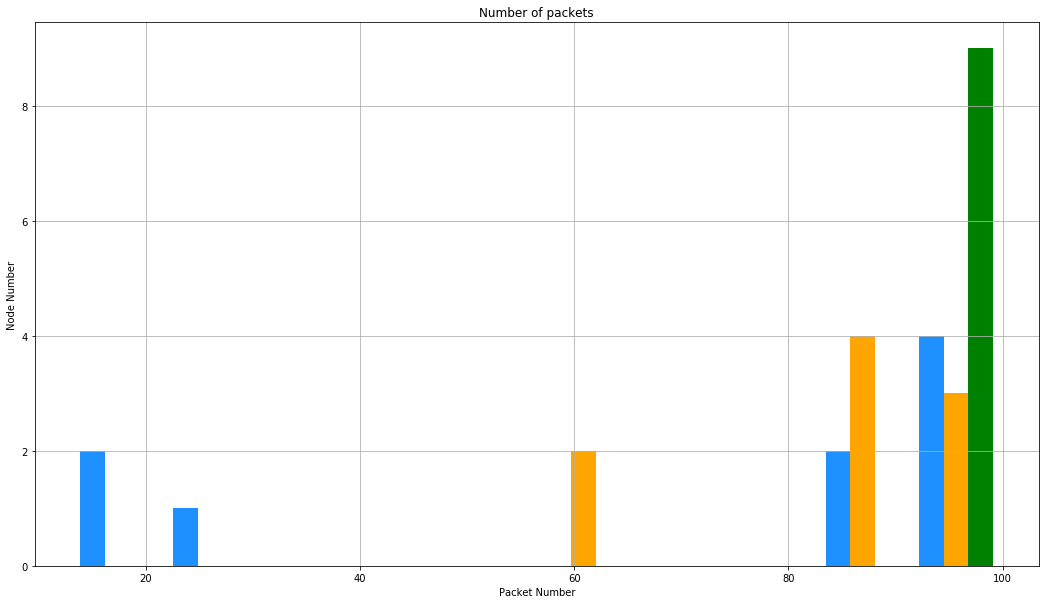

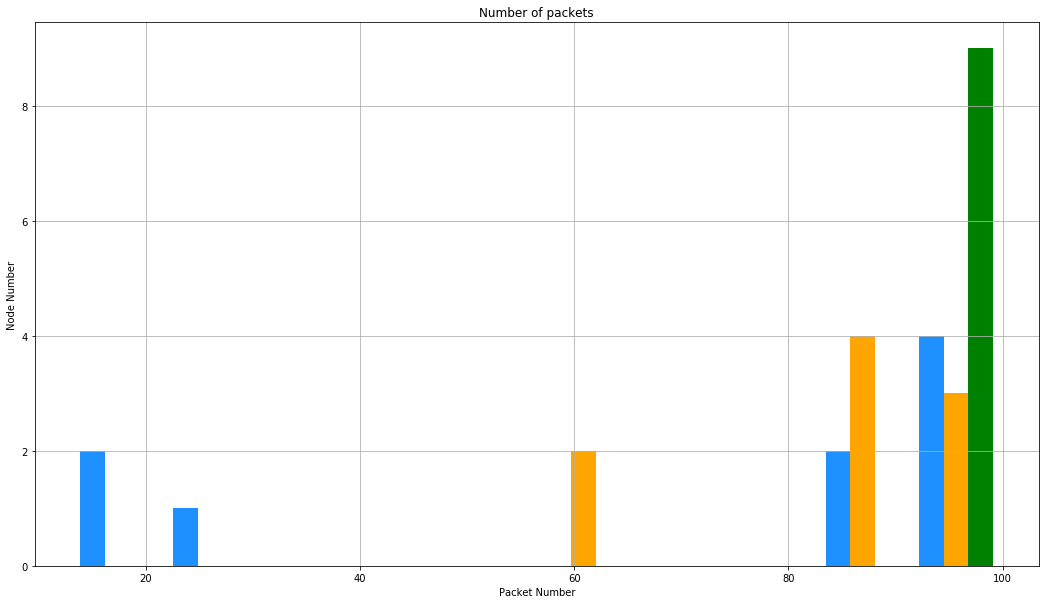

In [15]:
fig, axs = plt.subplots(1,figsize=(18,10))
axs.hist(numberOfPackets.transpose(),
                 color=colors,
                 orientation='vertical',
                 histtype='bar',
                
        )
axs.set_title("Number of packets")
axs.set_xlabel("Packet Number")
axs.set_ylabel("Node Number")
axs.grid(True)
#axs.legend()

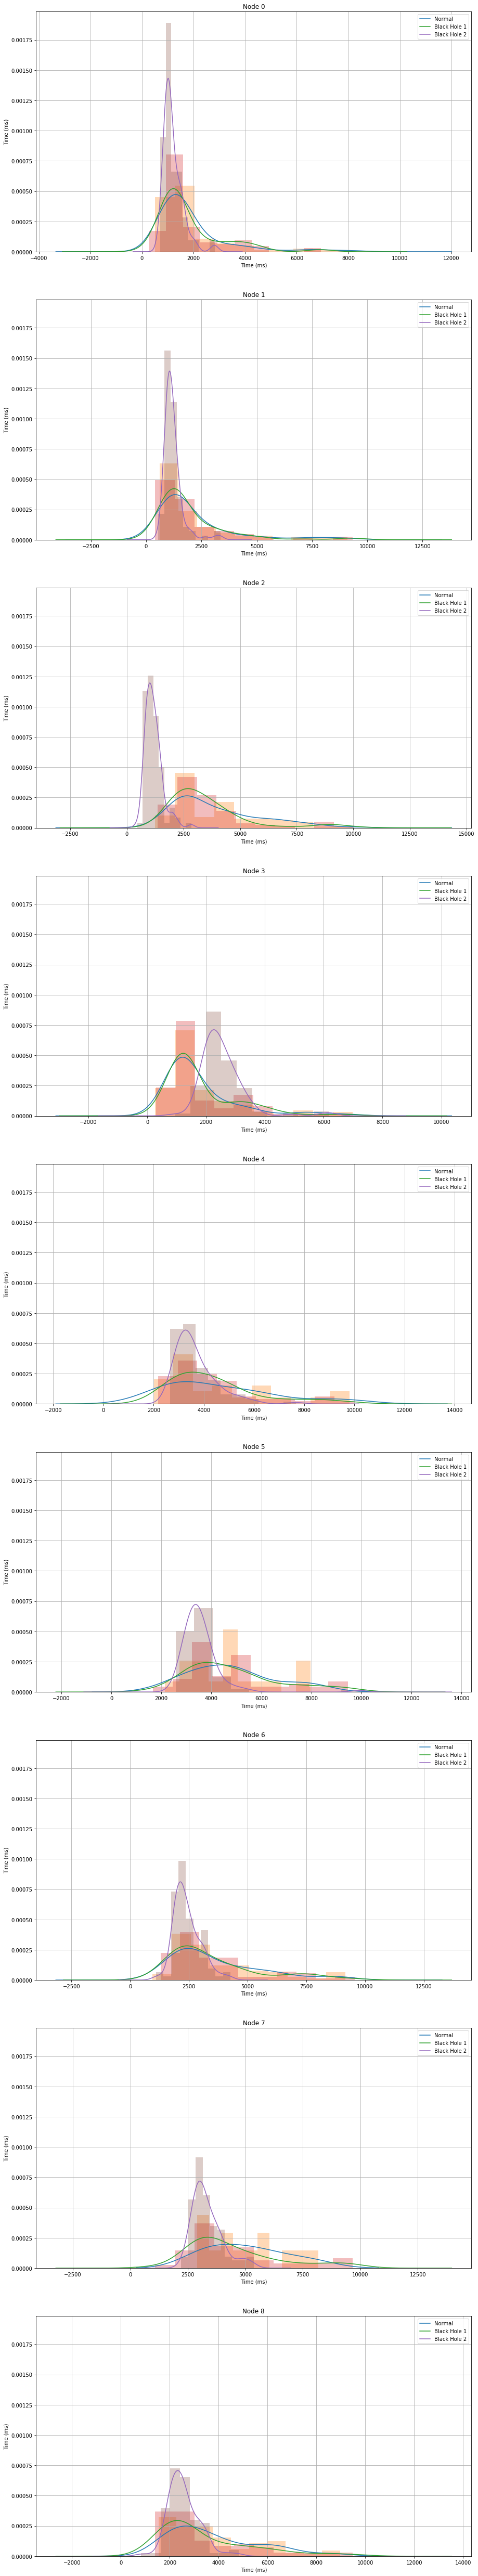

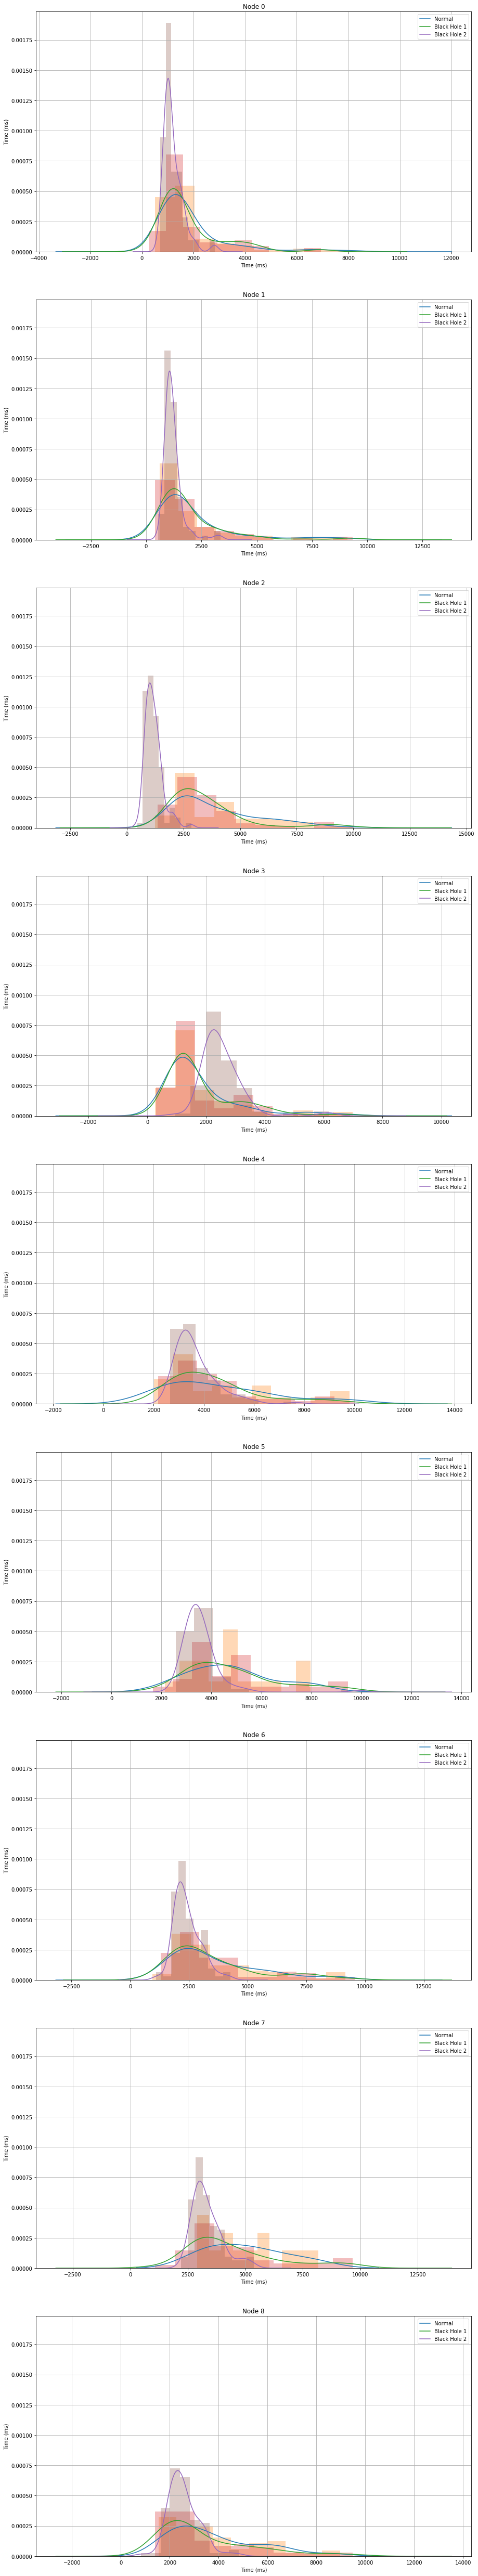

In [16]:
fig, axs= plt.subplots(len(data[0]),1, figsize=(15,90),sharey=True, )
for i in range(len(data)):
    for j in range(len(data[i])):
        data[i][j].pkts["rtt"].plot.kde(
            ax=axs[j],
            label=cases[i],
        )
        axs[j].set_ylabel("Time (ms)")
        data[i][j].pkts["rtt"].hist(density=True,alpha=0.3, ax=axs[j])
        axs[j].set_title("Node "+ str(j))
        axs[j].set_xlabel("Time (ms)")
        axs[j].legend()

Case 1= Normal Network
Case 2= Black Hole 1
Case 3= Black Hole 2

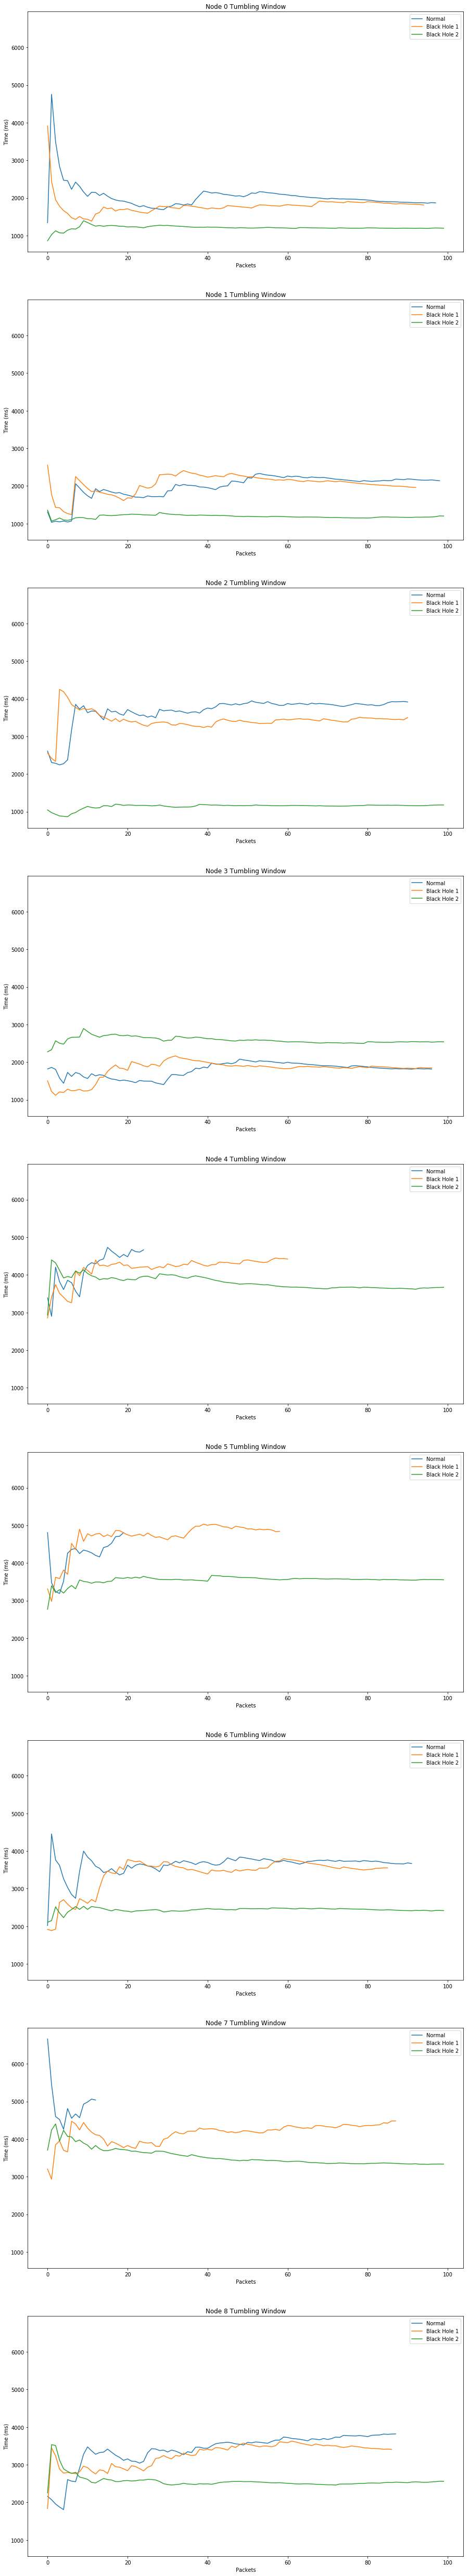

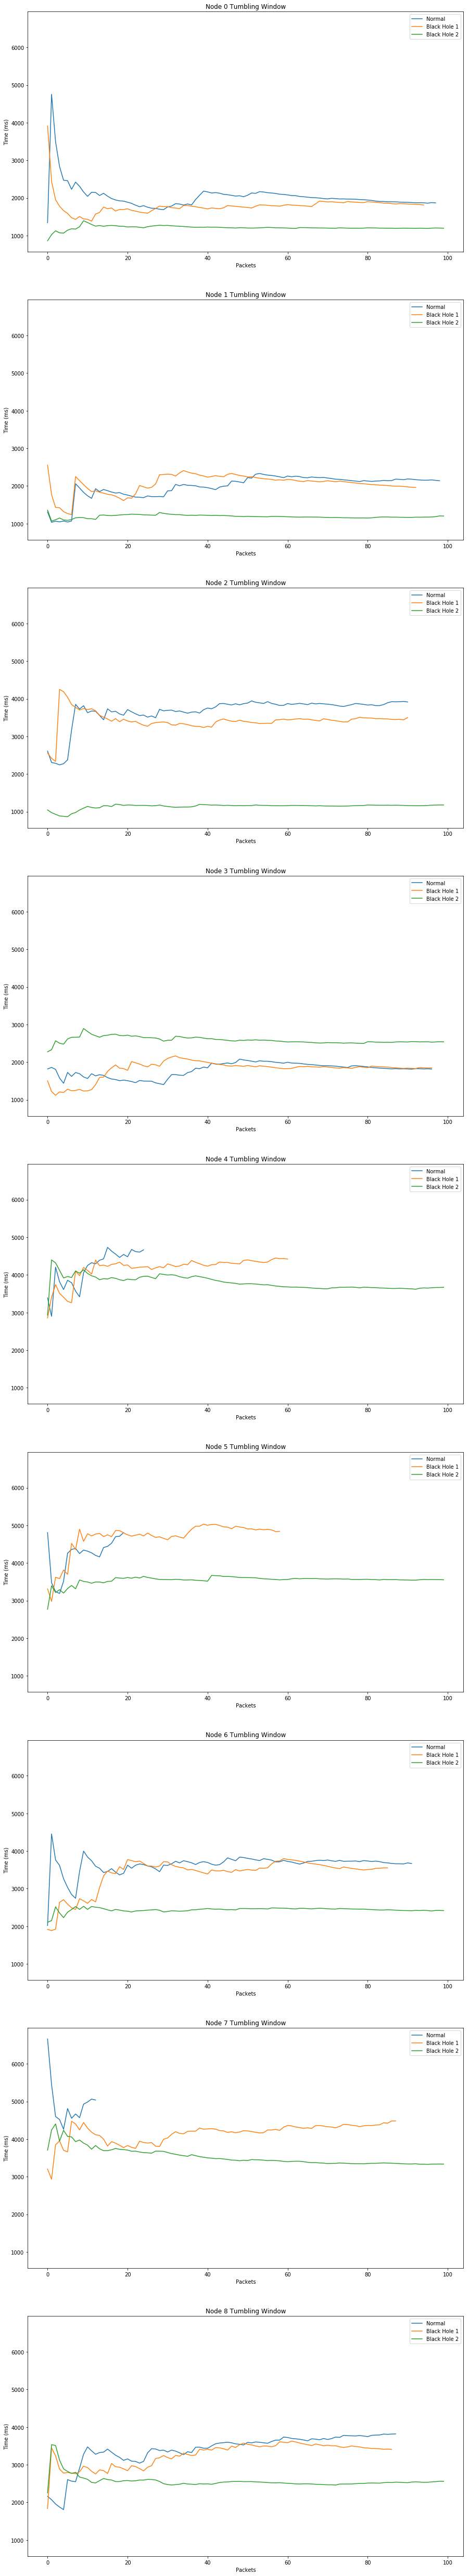

In [17]:
fig, axs= plt.subplots(len(data[0]),1, figsize=(15,90),sharey=True, )
for i in range(len(data)):
    for j in range(len(data[i])):
        axs[j].plot(
            data[i][j].pkts["rtt"].expanding(min_periods=1).mean(),
            #data[i][j].pkts["rtt"].groupby(data[i][j].pkts["rtt"].index // 10 * 10).mean(),
               #alpha=0.5,
              label=cases[i])
        axs[j].set_ylabel("Time (ms)")
        axs[j].set_title("Node "+ str(j)+ " Tumbling Window")
        axs[j].set_xlabel("Packets")
        axs[j].legend()

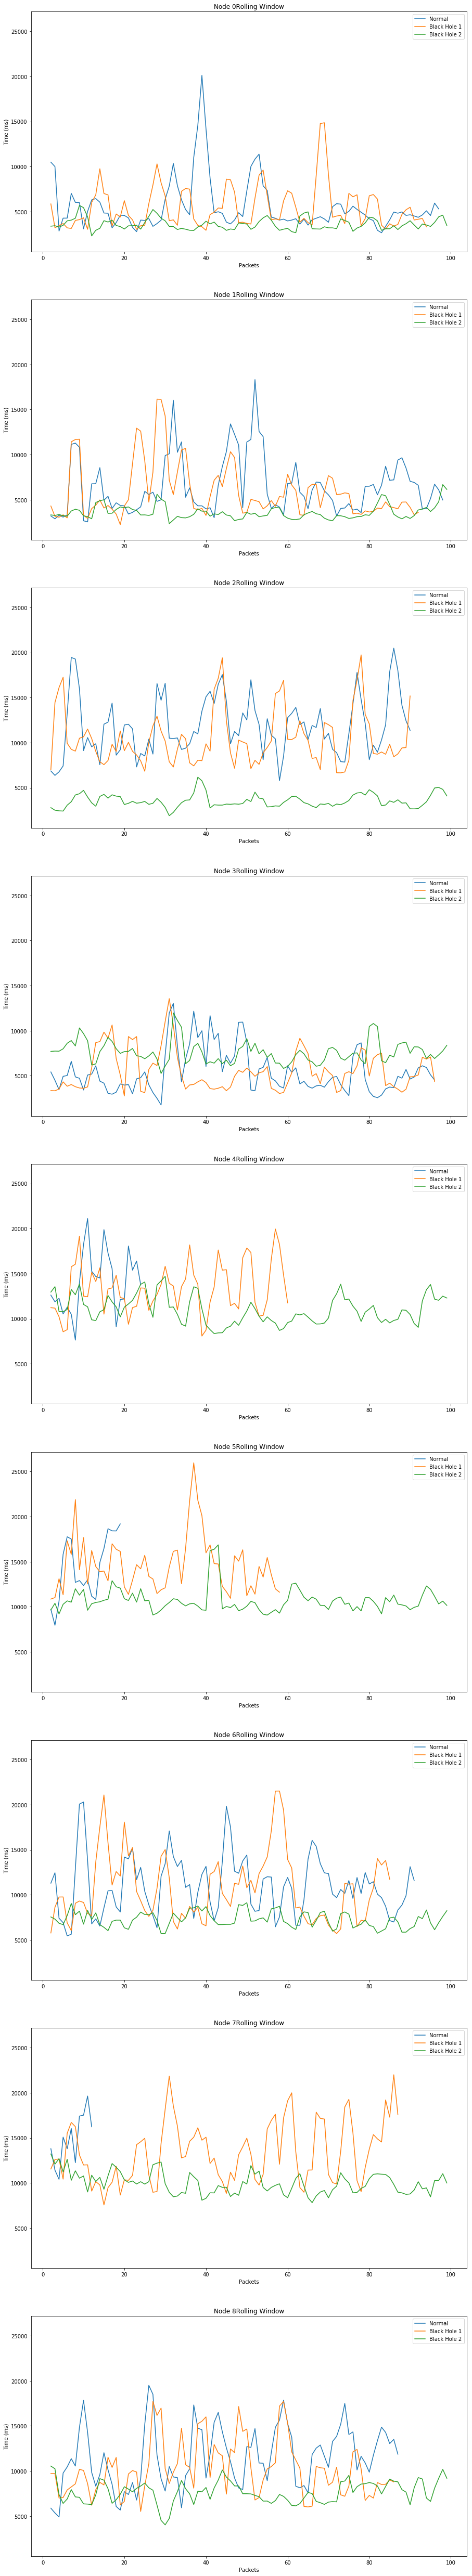

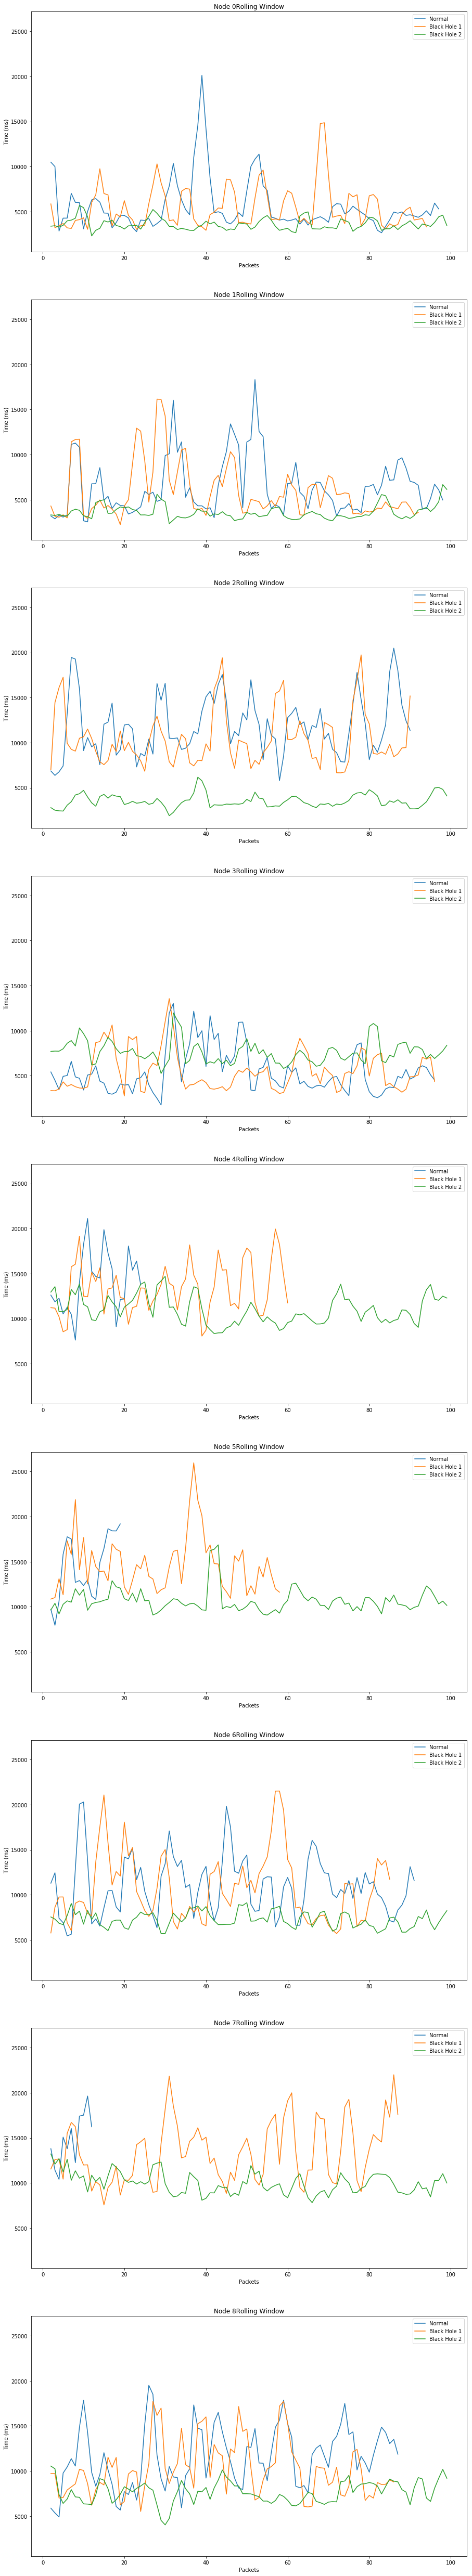

In [18]:
fig, axs= plt.subplots(len(data[0]),1, figsize=(15,90),sharey=True, )
for i in range(len(data)):
    for j in range(len(data[i])):
        axs[j].plot(
            data[i][j].pkts["rtt"].rolling(3).sum(),
              
              label=cases[i])
        axs[j].set_ylabel("Time (ms)")
        axs[j].set_title("Node "+ str(j)+ "Rolling Window")
        axs[j].set_xlabel("Packets")
        axs[j].legend()


In [3]:
MLPreparation(data)

count      98.000000
mean     1868.816327
std      1403.775442
min       498.000000
25%      1035.750000
50%      1404.500000
75%      1883.750000
max      8170.000000
Name: rtt, dtype: float64
count      99.000000
mean     2139.282828
std      1812.662114
min       615.000000
25%      1094.000000
50%      1430.000000
75%      2435.500000
max      9112.000000
Name: rtt, dtype: float64
count      91.000000
mean     3916.604396
std      1873.889033
min      1236.000000
25%      2471.000000
50%      3067.000000
75%      4722.000000
max      9972.000000
Name: rtt, dtype: float64
count      97.000000
mean     1815.742268
std      1308.893667
min       258.000000
25%      1035.000000
50%      1313.000000
75%      2029.000000
max      6985.000000
Name: rtt, dtype: float64
count      25.000000
mean     4667.000000
std      2220.932875
min      2004.000000
25%      3024.000000
50%      3943.000000
75%      6051.000000
max      9803.000000
Name: rtt, dtype: float64
count      20.000000
mean     

In [35]:
print(data[0][0].pkts.describe()['rtt'])

stats=pd.DataFrame(data[0][0].pkts.describe()['rtt'])
for i in range(len(data)):
    for j in range(len(data[i])):
            #df1 = df1.assign(e=p.Series(np.random.randn(sLength)).values)
            node=data[i][j]
            name=node.ip+" "+cases[i]
            #print(name)
            stats[name]=node.pkts['pkt'].describe()
            #stats= stats.assign(ip=pd.Series(node.pkts['pkt'].describe()).values)
            #stats.append(node.pkts['pkt'].describe())
stats=stats.drop("rtt",axis=1)
stats

count      98.000000
mean     1868.816327
std      1403.775442
min       498.000000
25%      1035.750000
50%      1404.500000
75%      1883.750000
max      8170.000000
Name: rtt, dtype: float64


aaaa::212:7404:4:404: Normal Network  \
count                             98.000000   
mean                              49.653061   
std                               29.287449   
min                                0.000000   
25%                               24.250000   
50%                               50.500000   
75%                               74.750000   
max                               99.000000   

       aaaa::212:7403:3:303: Normal Network  \
count                             99.000000   
mean                              49.808081   
std                               28.994256   
min                                0.000000   
25%                               25.500000   
50%                               50.000000   
75%                               74.500000   
max                               99.000000   

       aaaa::212:740b:b:b0b: Normal Network  \
count                             91.000000   
mean                              51.835165   
std                               29.083888   
min                                0.000000   
25%                               26.500000   
50%                               54.000000   
75%                               76.500000   
max                               99.000000   

       aaaa::212:7402:2:202: Normal Network  \
count                             97.000000   
mean                              50.206186   
std                               29.075669   
min                                0.000000   
25%                               25.000000   
50%                               51.000000   
75%                               75.000000   
max                               99.000000   

       aaaa::212:7409:9:909: Normal Network  \
count                             25.000000   
mean                              22.760000   
std                               15.535658   
min                                0.000000   
25%                               14.000000   
50%                               22.000000   
75%                               28.000000   
max                               50.000000   

       aaaa::212:740a:a:a0a: Normal Network  \
count                             20.000000   
mean                              20.900000   
std                               17.383901   
min                                1.000000   
25%                                6.500000   
50%                               15.500000   
75%                               28.750000   
max                               50.000000   

       aaaa::212:7405:5:505: Normal Network  \
count                             92.000000   
mean                              50.706522   
std                               29.732706   
min                                0.000000   
25%                               24.750000   
50%                               53.500000   
75%                               76.250000   
max                               99.000000   

       aaaa::212:7408:8:808: Normal Network  \
count                             13.000000   
mean                              26.307692   
std                               13.918720   
min                                7.000000   
25%                               15.000000   
50%                               26.000000   
75%                               29.000000   
max                               49.000000   

       aaaa::212:7407:7:707: Normal Network  \
count                             88.000000   
mean                              51.602273   
std                               28.883253   
min                                0.000000   
25%                               26.750000   
50%                               54.500000   
75%                               76.250000   
max                               99.000000   

       aaaa::212:7404:4:404: Black Hole Network 1  \
count                                   95.000000   
mean                                    49.663158   
std                             

count      98.000000
mean     1868.816327
std      1403.775442
min       498.000000
25%      1035.750000
50%      1404.500000
75%      1883.750000
max      8170.000000
Name: rtt, dtype: float64


aaaa::212:7404:4:404: Normal Network  \
count                             98.000000   
mean                              49.653061   
std                               29.287449   
min                                0.000000   
25%                               24.250000   
50%                               50.500000   
75%                               74.750000   
max                               99.000000   

       aaaa::212:7403:3:303: Normal Network  \
count                             99.000000   
mean                              49.808081   
std                               28.994256   
min                                0.000000   
25%                               25.500000   
50%                               50.000000   
75%                               74.500000   
max                               99.000000   

       aaaa::212:740b:b:b0b: Normal Network  \
count                             91.000000   
mean                              51.835165   
std                               29.083888   
min                                0.000000   
25%                               26.500000   
50%                               54.000000   
75%                               76.500000   
max                               99.000000   

       aaaa::212:7402:2:202: Normal Network  \
count                             97.000000   
mean                              50.206186   
std                               29.075669   
min                                0.000000   
25%                               25.000000   
50%                               51.000000   
75%                               75.000000   
max                               99.000000   

       aaaa::212:7409:9:909: Normal Network  \
count                             25.000000   
mean                              22.760000   
std                               15.535658   
min                                0.000000   
25%                               14.000000   
50%                               22.000000   
75%                               28.000000   
max                               50.000000   

       aaaa::212:740a:a:a0a: Normal Network  \
count                             20.000000   
mean                              20.900000   
std                               17.383901   
min                                1.000000   
25%                                6.500000   
50%                               15.500000   
75%                               28.750000   
max                               50.000000   

       aaaa::212:7405:5:505: Normal Network  \
count                             92.000000   
mean                              50.706522   
std                               29.732706   
min                                0.000000   
25%                               24.750000   
50%                               53.500000   
75%                               76.250000   
max                               99.000000   

       aaaa::212:7408:8:808: Normal Network  \
count                             13.000000   
mean                              26.307692   
std                               13.918720   
min                                7.000000   
25%                               15.000000   
50%                               26.000000   
75%                               29.000000   
max                               49.000000   

       aaaa::212:7407:7:707: Normal Network  \
count                             88.000000   
mean                              51.602273   
std                               28.883253   
min                                0.000000   
25%                               26.750000   
50%                               54.500000   
75%                               76.250000   
max                               99.000000   

       aaaa::212:7404:4:404: Black Hole Network 1  \
count                                   95.000000   
mean                                    49.663158   
std                             